**Make sure your compute resource is set to GPU else you'll need to reset your session from scratch**

---
Group yourself to 3 max, and fill in below details
Group member detail(s): \
1. Full Name - Student ID
2. Full Name - Student ID
3. Full Name - Student ID

Some of the concepts may be technically advanced, instead, it is to focus on learning how to effectively use Google Colab for scientific research. Don't fret if you dont understand any of codes written for you.

In [39]:
"1. Wee Chee Hung - 21B6015"

'1. Wee Chee Hung - 21B6015'

# Setting up Environment

Task 1: Set Up the Environment \
Import the necessary libraries for the exercise, PyTorch for neural network training.\
Load the CIFAR10 dataset.


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [29]:
# Set the device to GPU if available, otherwise, use CPU
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device = torch.device('cpu')

In [30]:
# Define the modified neural network architecture for CIFAR-10
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(8 * 8 * 32, 128)  # Adjusted for CIFAR-10 image size
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # Output size matches the number of CIFAR-10 classes (10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 8 * 8 * 32)  # Adjusted for CIFAR-10 image size
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x


Below are the Hyperparameters for the neural network (think of it as knobs that you can tune to enhance performance)


Task 4: Model debugging (Mess around with these 3 hyperparameters) \
hint: \
LEARNING_RATE: The current value is set to 1e10 (10000000000.0). Try adjusting it to find an optimal learning rate.\
BATCH_SIZE: Set it to a power of 2, such as 16, 32, or 64, to potentially improve training efficiency. \
EPOCH: Consider letting the model train for more epochs. The default value is set to 1; experiment with longer training durations for better convergence and performance evaluation.

In [31]:
BATCH_SIZE = 2
LEARNING_RATE = 0.0001
EPOCH = 10

In [32]:
# Function to train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.to(device)
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_predictions = 0  # Initialize a counter for correct predictions
        total_samples = 0  # Initialize a counter for total samples

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

             # Measure accuracy
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        # Calculate accuracy for the current epoch
        accuracy = 100.0 * correct_predictions / total_samples
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy}")
    print("Training complete!")


In [33]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms)

Files already downloaded and verified


In [34]:
# Load and preprocess the CFAR10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
#TODO: Complete below line to import CIFAR10 dataset
#uncommented the 2 lines of code and added the dataset CIFAR10 to be downloaded
train_set = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)

Files already downloaded and verified


In [35]:
train_set.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [36]:
# Create the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)

Task 2: Measure performance difference training between GPU and CPU


In [37]:
# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs=EPOCH)
#time taken to train using GPU : 10 mins 11 seconds
#Epoch 1/10, Loss: 1.8062, Accuracy: 35.684
#Epoch 2/10, Loss: 1.3978, Accuracy: 49.558
#Epoch 3/10, Loss: 1.2288, Accuracy: 56.144
#Epoch 4/10, Loss: 1.1054, Accuracy: 60.808
#Epoch 5/10, Loss: 1.0011, Accuracy: 64.808
#Epoch 6/10, Loss: 0.9184, Accuracy: 67.662
#Epoch 7/10, Loss: 0.8497, Accuracy: 70.394
#Epoch 8/10, Loss: 0.7896, Accuracy: 72.584
#Epoch 9/10, Loss: 0.7325, Accuracy: 74.546
#Epoch 10/10, Loss: 0.6752, Accuracy: 76.644

#time taken to train using CPU : 15 mins 32 seconds
#Epoch 1/10, Loss: 1.8226, Accuracy: 34.272
#Epoch 2/10, Loss: 1.3928, Accuracy: 49.91
#Epoch 3/10, Loss: 1.2167, Accuracy: 56.88
#Epoch 4/10, Loss: 1.0904, Accuracy: 61.48
#Epoch 5/10, Loss: 0.9913, Accuracy: 65.172
#Epoch 6/10, Loss: 0.9132, Accuracy: 68.008
#Epoch 7/10, Loss: 0.8485, Accuracy: 70.284
#Epoch 8/10, Loss: 0.7899, Accuracy: 72.638
#Epoch 9/10, Loss: 0.7326, Accuracy: 74.558
#Epoch 10/10, Loss: 0.6799, Accuracy: 76.452

Epoch 1/10, Loss: 1.8226, Accuracy: 34.272
Epoch 2/10, Loss: 1.3928, Accuracy: 49.91
Epoch 3/10, Loss: 1.2167, Accuracy: 56.88
Epoch 4/10, Loss: 1.0904, Accuracy: 61.48
Epoch 5/10, Loss: 0.9913, Accuracy: 65.172
Epoch 6/10, Loss: 0.9132, Accuracy: 68.008
Epoch 7/10, Loss: 0.8485, Accuracy: 70.284
Epoch 8/10, Loss: 0.7899, Accuracy: 72.638
Epoch 9/10, Loss: 0.7326, Accuracy: 74.558
Epoch 10/10, Loss: 0.6799, Accuracy: 76.452
Training complete!


Report your findings on:
*   What were the key differences you observed in the training speed between the GPU and CPU?
   
   From my observations and testings, GPU has a faster training speed compared to CPU, this results in a more efficient training method to use GPU instead, since it can go through more epochs at the same time frame as compared to CPU
*   Were there any challenges or limitations you encountered while using the GPU for training?

  I did not encounter any challanges or limitations while using the GPU for training

*   Did you notice any impact on the final model's performance (accuracy, loss) when trained on the GPU versus the CPU?

  Yes, i have noticed there is a slight difference in the final model's performance between training using GPU and CPU, here are the final results :

   GPU training :
   Loss: 0.6752, Accuracy: 76.644

   CPU training :
   Loss: 0.6799, Accuracy: 76.452

   CPU has slightly more loss and is slightly less accurate as compared to training done using GPU

Task 3: Visualize Loss and Accuracy


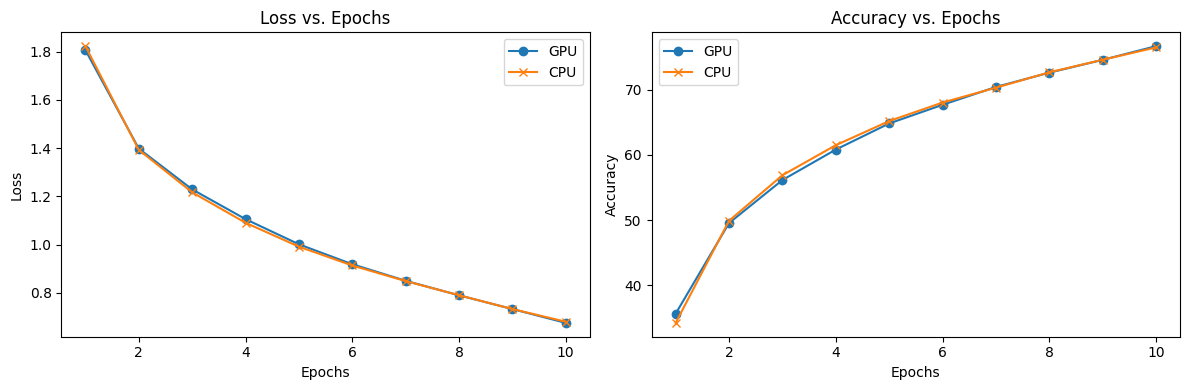

In [38]:
#TODO:
#Your plots goes here
import matplotlib.pyplot as plt

# Data for the first set (GPU)
loss_gpu = [1.8062, 1.3978, 1.2288, 1.1054, 1.0011, 0.9184, 0.8497, 0.7896, 0.7325, 0.6752]
accuracy_gpu = [35.684, 49.558, 56.144, 60.808, 64.808, 67.662, 70.394, 72.584, 74.546, 76.644]

# Data for the second set (CPU)
loss_cpu = [1.8226, 1.3928, 1.2167, 1.0904, 0.9913, 0.9132, 0.8485, 0.7899, 0.7326, 0.6799]
accuracy_cpu = [34.272, 49.91, 56.88, 61.48, 65.172, 68.008, 70.284, 72.638, 74.558, 76.452]

# Create two subplots (Loss and Accuracy)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot Loss against Epochs
ax1.plot(range(1, 11), loss_gpu, label='GPU', marker='o')
ax1.plot(range(1, 11), loss_cpu, label='CPU', marker='x')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Loss vs. Epochs')
ax1.legend()

# Plot Accuracy against Epochs
ax2.plot(range(1, 11), accuracy_gpu, label='GPU', marker='o')
ax2.plot(range(1, 11), accuracy_cpu, label='CPU', marker='x')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy vs. Epochs')
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()

Task 4: Test your own Image \
You can use the same code from the tutorial and ensure your model is properly trained!



In [ ]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize the image to match the model input size
    transforms.ToTensor(),  # Convert the image to a tensor
   transforms.Normalize((0.5,), (0.5,)),  # Normalize the image
])

# Function to preprocess and make predictions on the uploaded image
def predict_uploaded_image(upload):
    # Open the uploaded image
    image = Image.open(upload).convert('RGB')
    model.to("cpu")  # Set the model to evaluation mode

    # Preprocess the image
    input_tensor = transform(image)
    input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

    # Make predictions using the model
    with torch.no_grad():
        output = model(input_batch)
    _, predicted_idx = torch.max(output, 1)

    print(f"Predicted labels: {predicted_idx}")

In [ ]:
# Upload an image for prediction
uploaded = files.upload()

# If an image is uploaded, call the prediction function
if len(uploaded) > 0:
    for file_name in uploaded.keys():
        predict_uploaded_image(file_name)
else:
    print("No image uploaded.")
